In [1]:
# Importing required Libraries
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 1. Create your own dataset for text classification. It should contain at least 1000 words in total and at least two categories with at least 100 examples per category. You can create it by scraping the web or using some of the documents you have on your computer (do not use anything confidential).

Using web scraping to create personal dataset. Web scraping reviews for Ant-Man and the Wasp: Quantumania from IMDB website.

In [2]:
def get_reviews(num_reviews_to_scrape):
    reviewer_names = []
    review_dates = []
    review_titles = []
    review_texts = []
    user_ratings = []
    review_sentiments = []

    # set up the webdriver and navigate to the movie's reviews page
    driver = webdriver.Chrome()
    driver.get('https://www.imdb.com/title/tt10954600/reviews')

    # loop through each page of reviews until we scrape enough reviews
    while num_reviews_to_scrape > 0:
        # wait for the "load more" button to be clickable
        try:
            load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[@id="load-more-trigger"]')))
        except:
            break

        # click the "load more" button and wait for more reviews to load
        load_more_button.click()
        time.sleep(5)

        # parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # find all the review blocks
        review_blocks = soup.find_all('div', class_='review-container')

        # loop through each review block and extract relevant information
        for review_block in review_blocks:
            # extract the reviewer name and date
            reviewer_name = review_block.find('span', class_='display-name-link').text.strip()
            review_date = review_block.find('span', class_='review-date').text.strip()

            # extract the review title and text
            review_title = review_block.find('a', class_='title').text.strip()
            review_text = review_block.find('div', class_='text').text.strip()

            # extract the rating that the user gave
            rating = review_block.find('span', class_='rating-other-user-rating')
            if rating:
                rating_value = rating.find('span').text.strip()
            else:
                continue
            # If the rating is greater than or equal to 7.0, then the rating is flagged as positive else negative
            if float(rating_value) >= 7.0:
                review_sentiments.append('positive')
            else:
                review_sentiments.append('negative')
                
            # store the extracted information in the corresponding lists
            reviewer_names.append(reviewer_name)
            review_dates.append(review_date)
            review_titles.append(review_title)
            review_texts.append(review_text)
            user_ratings.append(rating_value)

            # decrement the number of reviews remaining to be scraped
            num_reviews_to_scrape -= 1
            if num_reviews_to_scrape == 0:
                break

        # check if all reviews have been loaded
        if not load_more_button.is_enabled():
            break

    # close the webdriver
    driver.quit()
    
    # create a DataFrame with the scraped data
    df = pd.DataFrame({'rating': review_sentiments, 'review': review_texts})
    
    return df


In [3]:
# get 1000 reviews
df = get_reviews(1000)

In [4]:
df.head(10)

,rating,review
0,negative,After most entries in Phase 4 passed by withou...
1,positive,"Well, I'll start off by saying that this wasn'..."
2,negative,"As a huge fan of the first one, and almost as ..."
3,negative,Well it's happened. The MCU has run out of gas...
4,negative,"New Ant-Man is not a bad movie, but it's repea..."
5,negative,I enjoyed watching Quantumania. It's a mostly ...
6,negative,"""Ant-Man and the Wasp: Quantumania"" is the fir..."
7,positive,LIKES:The Graphics/World Design\n-Marvel reall...
8,positive,Ant-Man's 3rd solo outting. Doubling down on t...
9,negative,Where do I even begin? They somehow made a mov...


In [5]:
df.shape

(1000, 2)

In [6]:
df.describe()

,rating,review
count,1000,1000
unique,2,197
top,positive,After most entries in Phase 4 passed by withou...
freq,618,8


Adding the data into a CSV file 

In [7]:
df.to_csv('my_dataset.csv',index=False)

<AxesSubplot:>

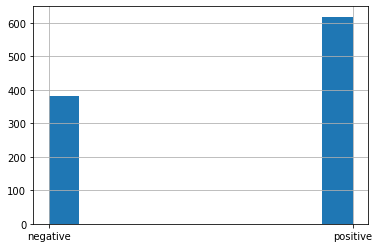

In [8]:
df['rating'].hist()

In [9]:
X=list(df['review'])

In [10]:
y=list(df['rating'])

In [11]:
# Independent Feature
X = list(df['review'])

In [12]:
# Dependent Feature
y = list(df['rating'])

In [13]:
y[:10]

['negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative']

In [14]:
pd.get_dummies(y,drop_first=True)

,positive
0,0
1,1
2,0
3,0
4,0
...,...
995,1
996,0
997,1
998,1


Encoding **y**

In [15]:
y = list(pd.get_dummies(y,drop_first=True)['positive'])

In [16]:
y[:10]

[0, 1, 0, 0, 0, 0, 0, 1, 1, 0]

# 2. Split the dataset into training (at least 160examples) and test (at least 40 examples) sets.

In [17]:
from sklearn.model_selection import train_test_split

# split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
len(X_train)

800

In [32]:
len(X_test)

200

In [33]:
len(y_train)

800

In [34]:
len(y_test)

200

In [18]:
X_train[:5]

["I've seen this film twice and it still grips me.First off, Scott (Paul Rudd) has excellent chemistry with everyone. The way Hope shines alongside him as they fight together really shows how much a heroine she is, even though the original Wasp gets more fleshed-out here than she (which is fine, because it was Janet's turn for that). And in all his interaction with Cassie, the love feels real, the frustration feels real, and the camaraderie is 100% consistent with where her character was when she was young. I'm amazed at how much attention was paid to dramatic detail and character-arc continuity. (Some recent MCU releases have lacked in those areas.)Also, I genuinely appreciated that Scott didn't fully learn the lesson Cassie sought to instill in him (caring about the plight of strangers just as much as family members), so this leaves room for his character arc. I'm glad it wasn't instant-morality-learned-in-a-snap. And in subtle ways, she also saw that her naïveté lacked wisdom and pl

In [19]:
y_train[:5]

[1, 0, 1, 0, 1]

# 3. Fine tune a pretrained language model capable of generating text (e.g., GPT) that you can take from the Hugging Face Transformers library with the dataset your created (I suggest using this tutorial: https://huggingface.co/docs/transformers/training). Report the test accuracy. Discuss what could be done to improve accuracy.

#### Since we are doing sentiment analysis on the data, we used Distilbert-base-uncased model 

In [20]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Tokenizing the train data 

In [21]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

Convert these encodings into dataset objects 

In [22]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encoding),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encoding),
    y_test
))
    

In [23]:
train_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

Defining training arguments for fine tuning 

In [24]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # number of epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,                # warmup steps
    weight_decay=0.01,
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps = 10,
)

Defining the trainer for the model 

In [25]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # Transformers model to be trained
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

Training the data on the model 

In [26]:
%%time
trainer.train()

CPU times: user 1min 27s, sys: 5.03 s, total: 1min 32s
Wall time: 1min 42s


Evaluating the dataset with test dataset 

In [27]:
# Evaluating loss
trainer.evaluate(test_dataset)

{'eval_loss': 0.07999256940988395}

In [28]:
prediction = trainer.predict(test_dataset)
prediction[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0], dtype=int32)

Confusion Matrix 

In [29]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test,prediction[1])
matrix

array([[ 72,   0],
       [  0, 128]])

Storing the model as antman_sentiment_analysis_model

In [30]:
trainer.save_model('antman_sentiment_analysis_model')

As we can see from the confusion matrix, the model has almost 100% accuracy for test dataset size of 200. In any other case, we can increase accuracy of a model by tweeking the parameters a little, for example, increasing the number of epochs or increasing the number of evaluation steps. 